## Árbores de decisión TITANIC
## Ralphy Núñez Mercado
Tomando como base este ejemplo de árboles de decisión, crea un modelo de árbol de decisión para estimar las predicciones de supervivencia de los pasajeros del Titanic.  Este es un ejemplo muy típico así que no tendrás problemas para analizarlo.

Visualiza además la matriz de confusión e indica todos los valores de las métricas que pueden utilizarse en este ejemplo.

Utiliza el dataset de Kaggle del Titanic

Compáralo con otros modelos/algoritmos ya vistos y explica tus conclusiones.


### Import necesarios

In [420]:
import pandas as pd
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,mean_squared_error
import seaborn as sns


### Cargar csv 

In [421]:
df = pd.read_csv('train.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Normalizar el csv
<p>Quitamos las columnas que aparentemente no necesitaremos.<p>

In [422]:

df.columns=['idpasajero','sobrevivio','clase','nombre','sexo','edad','sibsp','parch','ticket','tarifa','cabina','embarque']

df = df.drop(['idpasajero','nombre','sibsp','parch','ticket','cabina'],axis=1)


df['embarque'] = df.embarque.map({ 'Q': 2, 'S' : 1, 'C' : 0})
df['sexo'] = df.sexo.map({'male': 1, 'female': 0})





## Distribución de supervientes

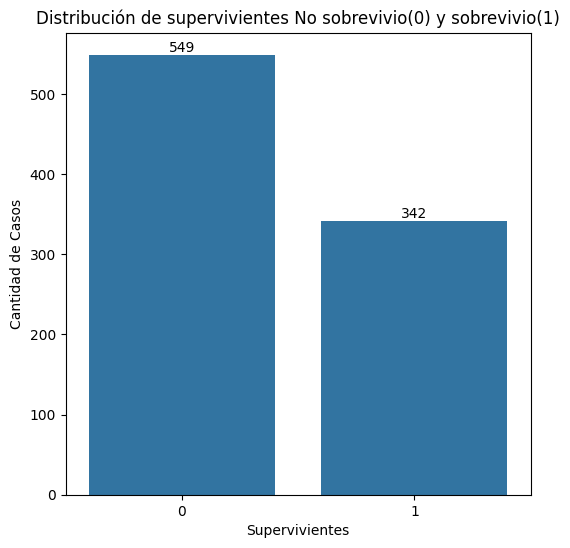

In [423]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='sobrevivio', data=df)

plt.title('Distribución de supervivientes No sobrevivio(0) y sobrevivio(1)')
plt.xlabel('Supervivientes')
plt.ylabel('Cantidad de Casos')
ax.bar_label(ax.containers[0])
plt.show()


### Dividir el dataset

In [424]:
X=df[['clase','sexo','edad','tarifa','embarque']]
y=df['sobrevivio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Entrenamiento del modelo

In [425]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)


# tree_clf2 = DecisionTreeClassifier(random_state=42)
# tree_clf2.fit(X, y)


DecisionTreeClassifier(max_depth=3, random_state=42)

### Estadísticas del modelo

In [426]:
print(f"Con max_depth = 3 y random_state = 42: {tree_clf.score(X,y)}")

# print(f"Con random_state=42: {tree_clf2.score(X,y)}")


Con max_depth = 3 y random_state = 42: 0.8215488215488216


### Visualización del árbol de decisión

In [427]:
export_graphviz(tree_clf, 
                out_file='ejemplo_titanic.dot',
                feature_names=['clase','sexo','edad','tarifa','embarque'],
                class_names=X.columns,
                rounded=True,
                filled=True)

In [428]:
! dot -Tpng ejemplo_titanic.dot -o ejemplo_titanic.png

### Hacer la prediccion y dibujar la matriz de confunsión 

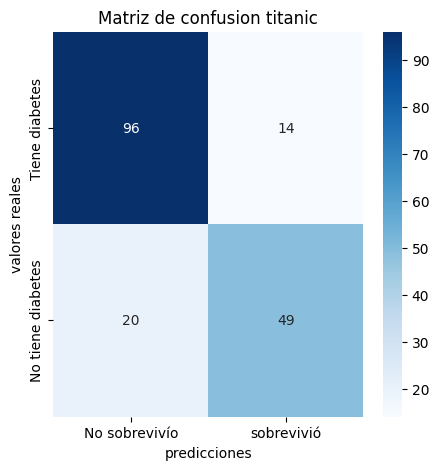

In [429]:
predicciones = tree_clf.predict(X_test)

cm= confusion_matrix(y_test,predicciones) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No sobrevivío", "sobrevivió"], yticklabels=["Tiene diabetes", "No tiene diabetes"])

plt.xlabel("predicciones")
plt.ylabel("valores reales")
plt.title("Matriz de confusion titanic")
plt.show()

### Mapa de calor

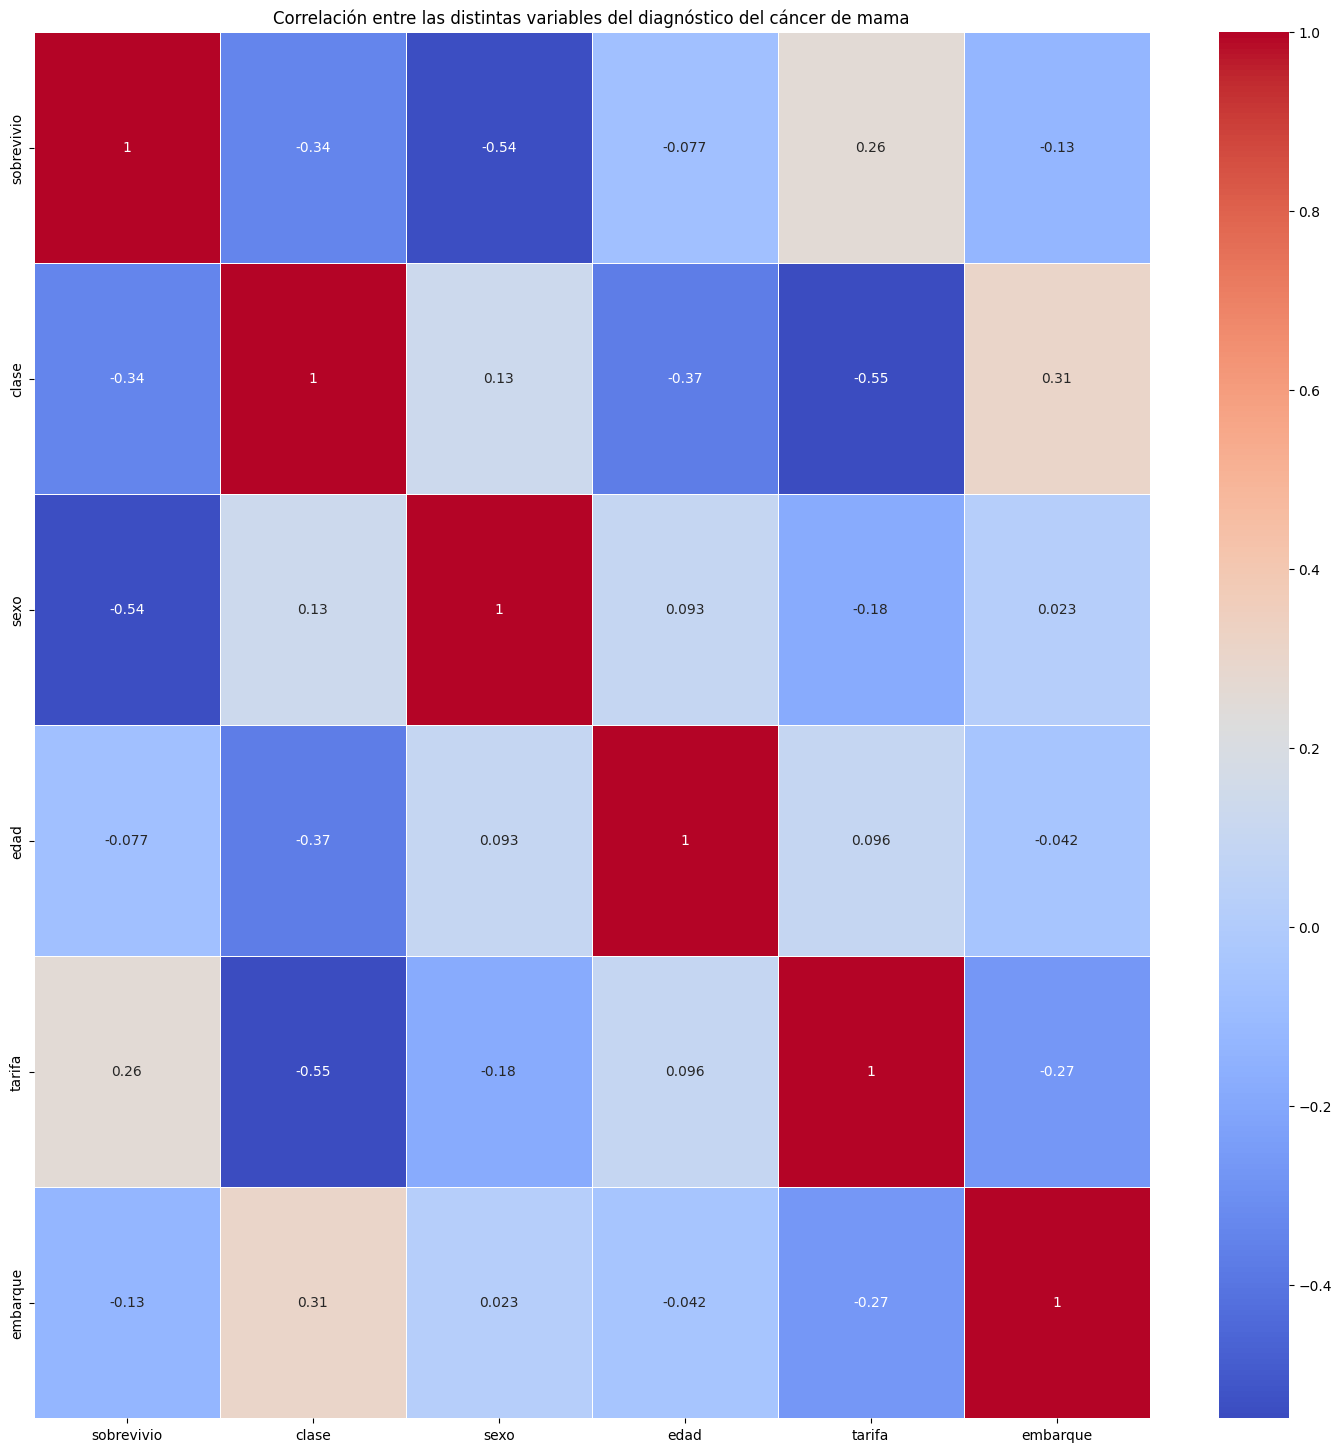

In [430]:
plt.figure(figsize=(18,18))
plt.title("Correlación entre las distintas variables del diagnóstico del cáncer de mama")
sns.heatmap(df.corr(), linewidths=0.5, cmap="coolwarm", annot=True)
plt.show()

### Comparación con otros modelos

### TIENE VALORES VACIOS EN EDAD!!!!

In [431]:
df = df.fillna(0)

X=df[['clase','sexo']]
y=df['sobrevivio']


X_train_modelos, X_test_modelos, y_train_modelos, y_test_modelos = train_test_split(X, y, test_size=0.2, random_state=0)

## Logistic Regresion 

In [432]:
# Crear el modelo de Regresión Logística (balanced para disminuir el desbalance del dataset, muchos más pacientes sin diabetes que con diabetes)
log_reg = LogisticRegression(class_weight='balanced', max_iter=10000)

# Entrenar el modelo con el conjunto de entrenamiento
log_reg.fit(X_train_modelos, y_train_modelos)

# Realizar predicciones con el conjunto de prueba
y_pred = log_reg.predict(X_test_modelos)

# Calcular Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test_modelos, y_pred))


Accuracy: 77.09%
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       110
           1       0.65      0.87      0.75        69

    accuracy                           0.77       179
   macro avg       0.77      0.79      0.77       179
weighted avg       0.80      0.77      0.77       179



## KNN Regresion

In [433]:
knn = KNeighborsClassifier()

# Distribución de hiperparámetros a explorar
param_distributions = {
    'n_neighbors': range(1, 12),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

# Random Search
random_search_knn = RandomizedSearchCV(knn, param_distributions, n_iter=44, cv=5, random_state=0)
random_search_knn.fit(X_train_modelos, y_train_modelos)

random_search_knn.score(X_test_modelos, y_test_modelos) 

prediccionesRandom = random_search_knn.predict(X_test_modelos)

accuracyRandom = accuracy_score(y_test_modelos, prediccionesRandom)

accuracyRandom

print(classification_report(y_test_modelos,prediccionesRandom))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



### Con GridSearch

In [434]:
knn = KNeighborsClassifier()

# Distribución de hiperparámetros a explorar
param_distributions = {
    'n_neighbors': range(1, 12),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

#Grid Search
grid_search_knn =  GridSearchCV(knn, param_distributions, cv=5)
grid_search_knn.fit(X_train_modelos, y_train_modelos)


grid_search_knn.score(X_test_modelos, y_test_modelos) 

prediccionesGrid = grid_search_knn.predict(X_test_modelos)

accuracyGrid = accuracy_score(y_test_modelos, prediccionesGrid)

print(classification_report(y_test_modelos,prediccionesRandom))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

